# Importing and Tidying Data

bikeshare_nyc_raw.csv:
* dock_id: official dock id provided by Citi Bike
* dock_name: official dock name provided by Citi Bike
* date: year-month-day format
* hour: hour of day (am/pm is determined by ‘pm’ variable)
* minute: minute of hour
* pm: 0–am 1–pm
* avail_bikes: number of available bikes
* avail_docks: number of available (empty) docks
* tot_docks: number of functioning (online) docks
* _lat: degrees latitude of station
* _long: degrees longitude of station

New properties
* statusValue: "Not In Service",
* statusKey: 3,
* stAddress1: "Pitt St & Stanton St",
* stAddress2: "",
* city: "",
* postalCode: "",
* location: "",
* altitude: "",
* testStation: false,
* lastCommunicationTime: "2018-03-16 04:17:02 AM",
* landMark: ""

In [22]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [23]:
#hacky method of getting folder names and breaking folders containing CSVs into four groups
pathName1 = os.getcwd() + '/AvailabilityData'
pathName2 = os.getcwd() + '/AvailabilityData2'
folderNames1 = os.listdir(pathName1) 
folderNames2 = os.listdir(pathName2)
folderBatch1 = folderNames1[1:int(len(folderNames1)/2)]
folderBatch2 = folderNames1[int(len(folderNames1)/2):]
folderBatch3 = folderNames2[1:int(len(folderNames2)/2)]
folderBatch4 = folderNames2[int(len(folderNames2)/2):]

#function that takes folder groups and takes their respective CSVs for combining, cleaning and setting datatypes
def importAndCleanData(pathName, folderBatch):
    # loop through each folder batches to append csv data to a dataframe (even the dirty data, coerce dtype errors later)
    dock_availability_df = pd.DataFrame()
    for folder in folderBatch:
        dock_availability_df = dock_availability_df.append(pd.read_csv(pathName+'/'+ folder +'/bikeshare_nyc_raw.csv',sep='\t',error_bad_lines = False
#                               ,warn_bad_lines=False
                             ))
    

    #create list of columns created by ignoring bad line errors and name it dirty_columns
    clean_columns = ['dock_id','dock_name','date','hour','minute','pm','avail_bikes','avail_docks','tot_docks','_lat','_long', 'in_service', 'status_key']
    dirty_columns = [c for c in dock_availability_df.columns if c not in clean_columns]

    #delete the rows that have values for the dirty columns and delete the dirty columns
    for column in dirty_columns:
#         dock_availability_df = dock_availability_df.drop(dock_availability_df[column].notnull())
        dock_availability_df = dock_availability_df.drop(column, axis=1)

    #convert columns to correct dtypes -decrease memory usage- and coerce errors
    numeric_columns = ['dock_id','hour','minute','avail_bikes','avail_docks','tot_docks','_lat','_long']
    category_columns = ['pm','in_service', 'status_key']
    dock_availability_df['date'] = pd.to_datetime(dock_availability_df['date'], format = '%y-%m-%d')

    for column in numeric_columns:
        dock_availability_df[column] = pd.to_numeric(dock_availability_df[column], errors = 'coerce')
        
    for column in category_columns:
        dock_availability_df[column] = dock_availability_df[column].astype('category')

    #drop rows with NaNs
    dock_availability_df = dock_availability_df.dropna()

    return dock_availability_df

In [24]:
df1 = importAndCleanData(pathName1, folderBatch1)
df1.head()

b'Skipping line 890470: expected 14 fields, saw 26090\n'
b'Skipping line 919921: expected 14 fields, saw 27122\n'
b'Skipping line 1130607: expected 14 fields, saw 494\nSkipping line 1130611: expected 14 fields, saw 11990\n'


,_lat,_long,avail_bikes,avail_docks,date,dock_id,dock_name,hour,in_service,minute,pm,status_key,tot_docks
0,40.767272,-73.993929,8.0,31.0,2015-03-01,72.0,W 52 St & 11 Ave,1,1,6,0,1,39.0
1,40.767272,-73.993929,8.0,31.0,2015-03-01,72.0,W 52 St & 11 Ave,1,1,16,0,1,39.0
2,40.767272,-73.993929,8.0,30.0,2015-03-01,72.0,W 52 St & 11 Ave,1,1,25,0,1,38.0
3,40.767272,-73.993929,8.0,30.0,2015-03-01,72.0,W 52 St & 11 Ave,1,1,35,0,1,38.0
4,40.767272,-73.993929,8.0,30.0,2015-03-01,72.0,W 52 St & 11 Ave,1,1,45,0,1,38.0


In [25]:
df2 = importAndCleanData(pathName1, folderBatch2)
"""'2016-04' dataframe has messed up data for "Verona Pl & Fulton St" & "PIT - Pitt St Yard" because of 
new properties introduced in the same dataset"""
df2.head()

b'Skipping line 1121989: expected 15 fields, saw 33231\n'
b'Skipping line 1198732: expected 16 fields, saw 35524\n'
b'Skipping line 596959: expected 14 fields, saw 26\n'
b'Skipping line 1529828: expected 14 fields, saw 26\n'


,_lat,_long,avail_bikes,avail_docks,date,dock_id,dock_name,hour,in_service,minute,pm,status_key,tot_docks
0,40.767272,-73.993929,15.0,24.0,2015-10-01,72,W 52 St & 11 Ave,1,1.0,30,0,1.0,39.0
1,40.767272,-73.993929,16.0,23.0,2015-10-01,72,W 52 St & 11 Ave,2,1.0,30,0,1.0,39.0
2,40.767272,-73.993929,16.0,23.0,2015-10-01,72,W 52 St & 11 Ave,2,1.0,42,0,1.0,39.0
3,40.767272,-73.993929,16.0,23.0,2015-10-01,72,W 52 St & 11 Ave,3,1.0,14,0,1.0,39.0
4,40.767272,-73.993929,16.0,23.0,2015-10-01,72,W 52 St & 11 Ave,3,1.0,20,0,1.0,39.0


In [26]:
df3 = importAndCleanData(pathName2, folderBatch3)
df3.head()

b'Skipping line 646269: expected 14 fields, saw 12914\n'
b'Skipping line 293035: expected 14 fields, saw 6962\n'
b'Skipping line 275480: expected 14 fields, saw 2786\nSkipping line 275483: expected 14 fields, saw 26\n'


,_lat,_long,avail_bikes,avail_docks,date,dock_id,dock_name,hour,in_service,minute,pm,status_key,tot_docks
0,40.767272,-73.993929,10,28,2016-06-01,72,W 52 St & 11 Ave,7,1,25,1,1,39
1,40.767272,-73.993929,11,27,2016-06-01,72,W 52 St & 11 Ave,7,1,34,1,1,39
2,40.767272,-73.993929,12,26,2016-06-01,72,W 52 St & 11 Ave,7,1,51,1,1,39
3,40.767272,-73.993929,12,26,2016-06-01,72,W 52 St & 11 Ave,8,1,9,1,1,39
4,40.767272,-73.993929,17,21,2016-06-01,72,W 52 St & 11 Ave,8,1,26,1,1,39


In [27]:
df4 = importAndCleanData(pathName2, folderBatch4)
df4.head()

,dock_id,dock_name,date,hour,minute,pm,avail_bikes,avail_docks,tot_docks,_lat,_long,in_service,status_key
0,72,W 52 St & 11 Ave,2017-04-01,1,29,0,12,27,39,40.767272,-73.993929,1,1
1,72,W 52 St & 11 Ave,2017-04-01,2,34,0,12,27,39,40.767272,-73.993929,1,1
2,72,W 52 St & 11 Ave,2017-04-01,3,42,0,12,27,39,40.767272,-73.993929,1,1
3,72,W 52 St & 11 Ave,2017-04-01,5,39,0,12,27,39,40.767272,-73.993929,1,1
4,72,W 52 St & 11 Ave,2017-04-01,8,56,0,8,31,39,40.767272,-73.993929,1,1


In [28]:
station_availability_df = pd.concat([df1, df2, df3, df4])

In [29]:
#transform hour + pm into 24hr
station_availability_df.loc[station_availability_df.pm == 1, 'hour'] = station_availability_df.loc[station_availability_df.pm == 1, 'hour'] + 12
station_availability_df.loc[(station_availability_df['hour'] == 12),'hour'] = 0
station_availability_df.loc[(station_availability_df['hour'] == 24),'hour'] = 12
station_availability_df = station_availability_df.drop('pm', axis=1)
station_availability_df.head()

,_lat,_long,avail_bikes,avail_docks,date,dock_id,dock_name,hour,in_service,minute,status_key,tot_docks
0,40.767272,-73.993929,8.0,31.0,2015-03-01,72.0,W 52 St & 11 Ave,1,1.0,6,1,39.0
1,40.767272,-73.993929,8.0,31.0,2015-03-01,72.0,W 52 St & 11 Ave,1,1.0,16,1,39.0
2,40.767272,-73.993929,8.0,30.0,2015-03-01,72.0,W 52 St & 11 Ave,1,1.0,25,1,38.0
3,40.767272,-73.993929,8.0,30.0,2015-03-01,72.0,W 52 St & 11 Ave,1,1.0,35,1,38.0
4,40.767272,-73.993929,8.0,30.0,2015-03-01,72.0,W 52 St & 11 Ave,1,1.0,45,1,38.0


# Exploring and Cleaning Data

In [9]:
# def check_null_or_valid(row_data):
#     """Function that takes a row of data,
#     drops all missing values,
#     and checks if all remaining values are greater than or equal to 0
#     """
#     no_na = row_data.dropna()[1:-1]
#     numeric = pd.to_numeric(no_na)
#     ge0 = numeric >= 0
#     return ge0

# # Check whether the first column is 'Life expectancy'
# assert g1800s.columns[0] == 'Life expectancy'

# # Check whether the values in the row are valid
# assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# # Check that there is only one instance of each country
# assert g1800s['Life expectancy'].value_counts()[0] == 1

In [10]:
print(station_availability_df.info())
#drop rows with null values in dirty columns: 27662565 records
#drop rows with values in dirty columns: 26290342

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27662626 entries, 0 to 706495
Data columns (total 12 columns):
_lat           float64
_long          float64
avail_bikes    float64
avail_docks    float64
date           datetime64[ns]
dock_id        float64
dock_name      object
hour           int64
in_service     float64
minute         int64
status_key     object
tot_docks      float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 2.7+ GB
None


In [11]:
print(station_availability_df.describe())

               _lat         _long   avail_bikes   avail_docks       dock_id  \
count  2.766263e+07  2.766263e+07  2.766263e+07  2.766263e+07  2.766263e+07   
mean   4.072131e+01 -7.397305e+01  1.101348e+01  1.983370e+01  1.379419e+03   
std    5.117695e-01  9.249626e-01  1.063233e+01  1.338131e+01  1.338704e+03   
min    0.000000e+00 -7.409752e+01  0.000000e+00  0.000000e+00  7.200000e+01   
25%    4.070583e+01 -7.399724e+01  2.000000e+00  9.000000e+00  3.400000e+02   
50%    4.072491e+01 -7.398409e+01  8.000000e+00  1.900000e+01  4.760000e+02   
75%    4.074972e+01 -7.396818e+01  1.700000e+01  2.900000e+01  3.108000e+03   
max    4.407427e+02  7.397713e+01  2.260000e+02  6.700000e+01  3.306100e+04   

               hour    in_service        minute     tot_docks  
count  2.766263e+07  2.766263e+07  2.766263e+07  2.766263e+07  
mean   1.161701e+01  9.474849e-01  2.949508e+01  3.177395e+01  
std    6.946070e+00  2.230633e-01  1.732305e+01  1.199191e+01  
min    0.000000e+00  0.000000e+0

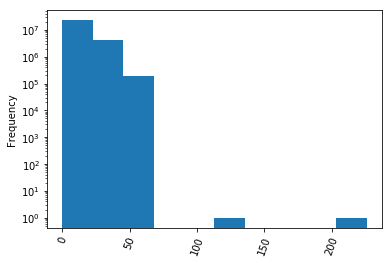

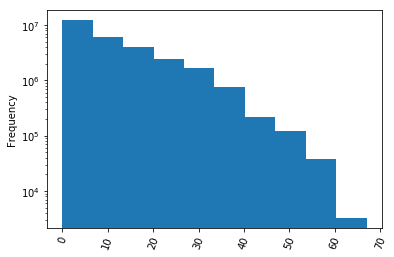

In [12]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
%matplotlib inline

# get rid of avail_bikes outliers
station_availability_df['avail_bikes'].plot(kind='hist', rot=70, logy=True)
plt.show()
station_availability_df = station_availability_df[station_availability_df.avail_bikes <= 100]
station_availability_df['avail_bikes'].plot(kind='hist', rot=70, logy=True)
plt.show()

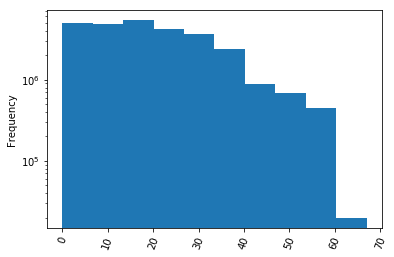

In [13]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
%matplotlib inline

# no avail_docks outliers to get rid of
station_availability_df['avail_docks'].plot(kind='hist', rot=70, logy=True)

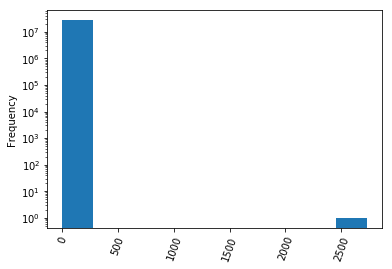

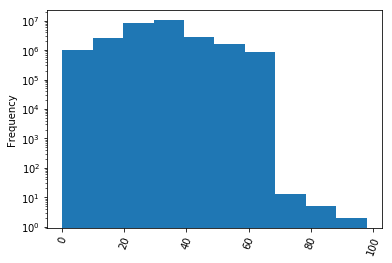

In [14]:
# get rid of tot_docks outliers
station_availability_df['tot_docks'].plot(kind='hist', rot=70, logy=True)
plt.show()
station_availability_df = station_availability_df[station_availability_df.tot_docks != 2727]
station_availability_df['tot_docks'].plot(kind='hist', rot=70, logy=True)
plt.show()

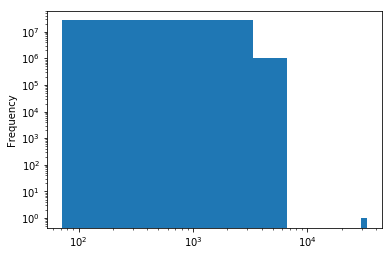

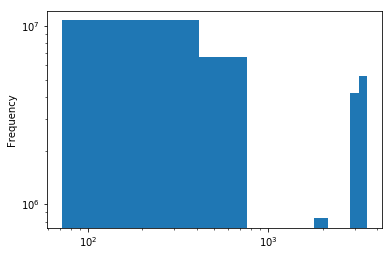

In [15]:
#get rid of docks without enough data points: more or equal to 1440, as this is how many rows a dock generates a month
station_availability_df['dock_id'].plot(kind='hist', logx = True, logy=True)
plt.show()
station_availability_df = station_availability_df.groupby('dock_id').filter(lambda x: len(x) >= 1440)
station_availability_df['dock_id'].plot(kind='hist', logx = True, logy=True)
plt.show()

In [16]:
#see data distribution of active/inactive stations
station_availability_df.loc[station_availability_df['status_key']==1,'status_value'] = "In Service"
station_availability_df.loc[station_availability_df['status_key']==3,'status_value'] = "Not In Service"
station_availability_df.status_value.value_counts()

In Service        26158175
Not In Service     1480780
Name: status_value, dtype: int64

In [17]:
#function for seeing average number of bikes at a dock over the hours of the day, averaged amongst every day
def plotAverageAvailBikes(dockId):
    graph_df = station_availability_df[station_availability_df['dock_id']==dockId].groupby(['hour']).agg({'avail_bikes': [np.mean]})
    graph_df = graph_df.reset_index()
    graph_df.columns = graph_df.columns.droplevel(1)
    plt.plot(graph_df['hour'], graph_df['avail_bikes'])
    plt.rcParams['figure.figsize'] = [30.0, 10.0]
    plt.xlabel('hour')
    plt.xticks(range(0,25))
    plt.ylabel('avail_bikes')
    plt.show()

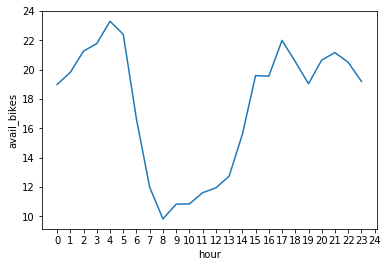

In [18]:
# most rebalancing
plotAverageAvailBikes(521)

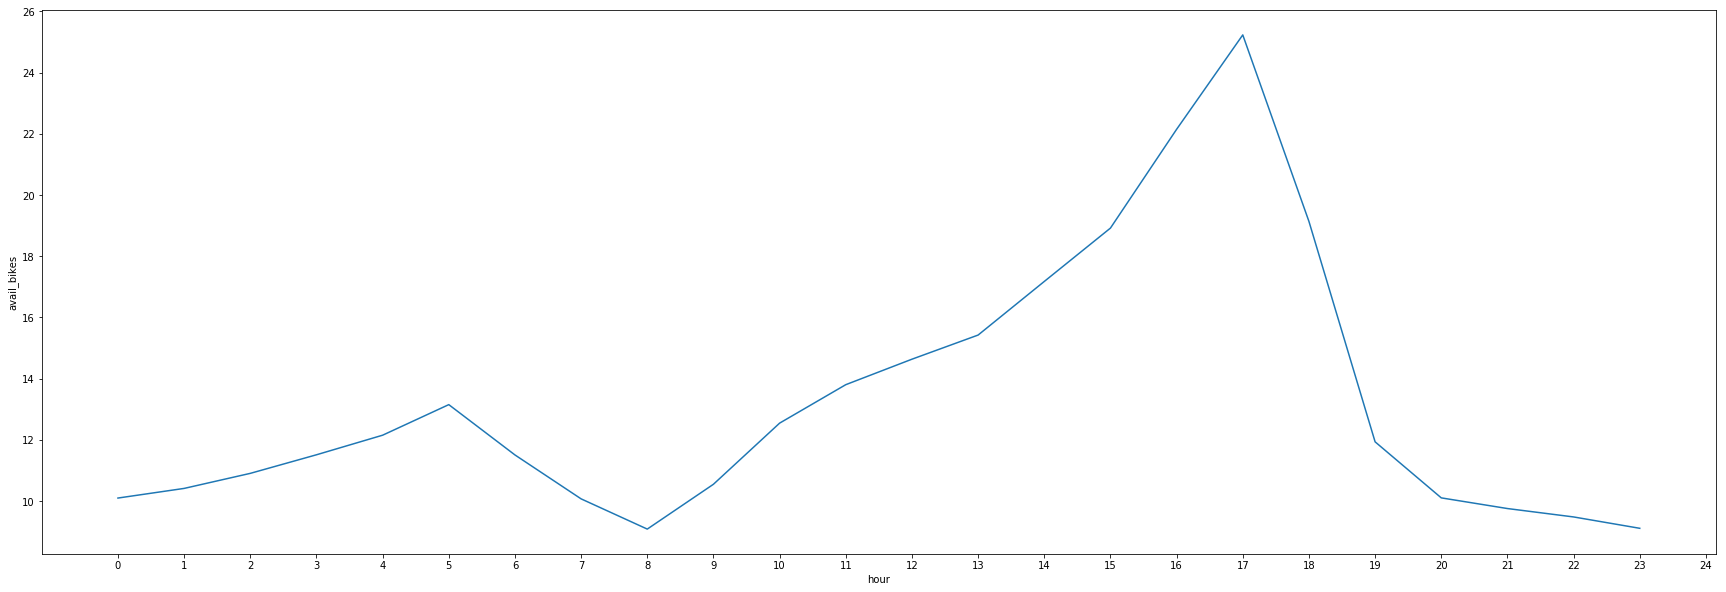

In [19]:
# most bikes taken
plotAverageAvailBikes(519)

# Data Modeling